# Telco Customer Churn
### Created By : Erron Trivianto Hudyono

## 1. Business Problem Understanding

**1.1 Context**  
Telco Company ingin memahami loyalitas pelanggan di antara mereka yang telah berlangganan layanan telekomunikasi mereka. Banyak pelanggan bergabung dengan Telco Company, dan perusahaan ini ingin mengidentifikasi pelanggan mana yang cenderung tetap setia atau berpotensi churn (berhenti berlangganan) setelah jangka waktu tertentu. Seorang pelanggan dikategorikan mengalami churn jika kontraknya telah berakhir dan tidak diperbarui dengan kontrak baru. Berdasarkan laporan rekap tahunan yang disajikan dalam dataset, Telco Company mencatat tingkat churn sebesar 27.39%. 

Menurut https://customergauge.com/blog/average-churn-rate-by-industry, rata-rata churn rate di industri telekomunikasi adalah 21% pada tahun 2020 dan meningkat menjadi 31% pada tahun 2021. Meskipun churn rate di Telco Company berada dalam rentang standar churn rate di industri ini, Telco Company terus berambisi untuk terus menurunkannya. Tingginya tingkat churn ini tidak hanya mengikis pendapatan, tetapi juga meningkatkan biaya operasional terkait dengan akuisisi pelanggan baru. Dengan menganalisis dan memprediksi pelanggan yang kemungkinan akan churn, kita dapat lebih fokus pada strategi untuk mempertahankan pelanggan tersebut.

**1.2 Problem Statement :**

Proses mempertahankan pelanggan dapat memakan waktu dan sumber daya yang besar jika perusahaan menargetkan semua pelanggan tanpa melakukan penyaringan terlebih dahulu. Perusahaan ingin meningkatkan efisiensi retensi dengan mengidentifikasi pelanggan mana yang berisiko churn (berhenti berlangganan), sehingga mereka dapat fokus pada strategi untuk mempertahankan pelanggan tersebut.

Strategi yang dimaksud meliputi menawarkan layanan yang sesuai dengan kebutuhan mereka dari segi harga atau memberikan diskon khusus. Namun, jika perusahaan menawarkan program atau strategi retensi kepada semua pelanggan tanpa pandang bulu, biaya yang dikeluarkan bisa menjadi sia-sia. Hal ini terjadi jika pelanggan yang ditargetkan tetap memutuskan untuk churn, atau sebaliknya, pelanggan yang tidak pernah berniat churn sejak awal menjadi sasaran yang tidak perlu.

**1.3 Why :**

Normalnya perusahaan harus menggunakan pendekatan umum untuk retensi pelanggan secara analisa manual, seperti memberikan diskon atau penawaran khusus kepada semua pelanggan, yang dapat mengakibatkan biaya operasional yang tinggi dan kurangnya efisiensi. Pendekatan ini tidak dapat membedakan pelanggan yang berisiko churn dari pelanggan yang setia, sehingga banyak upaya dan sumber daya yang terbuang sia-sia.

Dengan menggunakan machine learning, perusahaan dapat secara efektif memprediksi pelanggan mana yang kemungkinan besar akan churn berdasarkan data historis dan pola perilaku. Model machine learning dapat membantu perusahaan untuk secara proaktif menargetkan pelanggan yang berisiko tinggi dan menerapkan strategi retensi yang lebih spesifik dan tepat sasaran, sehingga mengurangi churn dan meningkatkan efisiensi biaya.

**1.4 Goals :**

Berdasarkan masalah tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan churn atau tidak, sehingga dapat menurunkan tingkat churn rate hingga 20% atau ke bawah.

**1.5 Stakeholder :**

Model machine learning ini ditujukan untuk membantu tim departemen pemasaran dan penjualan.

**1.6 Target :**

0 : Pelanggan tidak melakukan churn

1 : Pelanggan melakukan churn 

**1.7 Analytic Approach :**

Selanjutnya, kami akan membangun model klasifikasi yang dapat membantu perusahaan memprediksi kemungkinan seorang pelanggan akan churn. Kami akan menganalisis data pelanggan untuk menemukan pola yang membedakan pelanggan yang cenderung tetap berlangganan dari mereka yang berisiko churn.

**1.8 Metric Evaluation**

Type 1 error `False Positive` : Model memprediksi pelanggan akan melakukan churn, namun justru sebaliknya.
Konsekuensi: Pemborosan sumber daya karena perusahaan mungkin memberikan insentif/diskon atau melakukan tindakan retensi yang tidak perlu.

Type 2 error `False Negative` : Model memprediksi pelanggan tidak melakukan churn, namun justru sebaliknya.
Konsekuensi: Kehilangan peluang untuk mempertahankan pelanggan 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi churn rate dari perusahaan, tetapi tanpa membuat terlalu banyak false positive dan false negative. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar. Dengan kata lain, metric evaluasi utama yang akan kita gunakan adalah churn rate.


## 2. Data Understanding

Dataset source : https://drive.google.com/drive/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Text | Whether the customer has dependents or not |
| Tenure | Text | Number of months the customer has stayed with the company |
| OnlineSecurity | Float | Whether the customer has online security or not |
| OnlineBackup | Text | Whether the customer has online backup or not |
| InternetService | Text | Whether the client is subscribed to Internet service |
| DeviceProtection | Text | Whether the client has device protection or not |
| TechSupport | Text | Whether the client has tech support or not |
| Contract | Text | Type of contract according to duration |
| PaperlessBilling | Text | Bills issued in paperless form |
| MonthlyCharges | Text | Amount of charge for service on monthly bases |
| Churn | Text | Whether the customer churns or not |

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, SelectFpr
from sklearn.compose import ColumnTransformer

from category_encoders import BinaryEncoder

# Balancing
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Ensemble
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipeline

# Metric
from sklearn.metrics import classification_report, make_scorer, f1_score, recall_score, precision_score, roc_auc_score, fbeta_score
from imblearn.metrics import classification_report_imbalanced

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Visualisai
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In [2]:
#Load Dataset
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


## 3. Data Cleaning

**3.1 Missing Values**

Langkah pertama yang akan kita lakukan adalah mengecek apakah terdapat nilai kosong/missing values pada suatu baris dan kolom dalam dataset.

In [4]:
# Check Missing Values

# Cek total baris kosong
total_na_rows = df.isnull().any(axis=1).sum()
msg = f"Terdapat nilai kosong sebanyak {total_na_rows} baris" if total_na_rows else "Tidak ada nilai kosong" 

# Cek total baris kosong pada setiap kolom
print(df.isnull().sum())
print("")
print(msg)

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak ada nilai kosong


**3.2 Duplicated Data**

Setelah tidak ada nilai kosong yang ditemukan, selanjutnya kita akan melakukan pengecekkan terhadap duplikat baris yang terjadi dalam dataset. 

In [5]:
# Check duplicated

total_duplicated_row = df.duplicated().sum()
msg = f"Terdapat baris duplikat sebanyak {total_duplicated_row} baris" if total_duplicated_row else "Tidak ada baris duplikat" 

print(msg)

Terdapat baris duplikat sebanyak 77 baris


Untuk setiap duplikat baris yang ditemukan akan dilakukan drop untuk mengoptimalkan kinerja model machine learning.

In [6]:
df = df.drop_duplicates()

In [7]:
# Check duplicated After Drop

total_duplicated_row = df.duplicated().sum()
msg = f"Terdapat baris duplikat sebanyak {total_duplicated_row} baris" if total_duplicated_row else "Tidak ada baris duplikat" 

print(msg)

Tidak ada baris duplikat


**3.3 Unique Values**

Setelah baris duplikat telah tidak ditemukan lagi, berikutnya kita akan melakukan pengecekkan terhadap informasi values dari setiap feature yang terdapat dalam dataset.

In [8]:
columns = df.columns
na_values = [df[col].isnull().sum() for col in columns]
n_unique_values = [df[col].nunique() for col in columns]
unique_values = [df[col].unique() for col in columns]

pd.DataFrame({
    'Features': columns,
    'NA Values': na_values,
    'Total Unique': n_unique_values,
    'Unique Values': unique_values
})

,Features,NA Values,Total Unique,Unique Values
0,Dependents,0,2,"[Yes, No]"
1,tenure,0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,0,3,"[No, Yes, No internet service]"
3,OnlineBackup,0,3,"[No, Yes, No internet service]"
4,InternetService,0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,0,3,"[Yes, No internet service, No]"
6,TechSupport,0,3,"[Yes, No, No internet service]"
7,Contract,0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,0,2,"[Yes, No]"
9,MonthlyCharges,0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


**3.4 Data Preparation For Analysis**

Berbekal dari informasi pada unique values, target yang akan kita gunakan untuk diprediksi oleh model machine learning yaitu Churn. Untuk memudahkan metode machine learning, kita akan ubah value churn dalam bentuk binary.

In [9]:
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\erron.hudyono\AppData\Local\Temp\ipykernel_17828\3166012144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\erron.hudyono\AppData\Local\Temp\ipykernel_17828\3166012144.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[

Selanjutnya, kita perlu mengecek apakah informasi dalam dataset telah valid setepat-tepatnya. Kita mengetahui bahwa pelanggan dinyatakan melakukan churn setelah kontrak layanan mereka habis. Berarti seharusnya dapat kita anggap bahwa lama tenure (dalam bulan) tidak boleh kurang dari lama kontrak layanan. Contoh kontrak layanan 1 tahun (12 bulan), berarti lama tenure minimal adalah 12 bulan. Apabila tidak sesuai, maka akan kita lakukan drop untuk data yang tidak valid 

In [10]:
def convert_to_months(contract):
    if contract == 'One year':
        return 12
    elif contract == 'Two year':
        return 24
    elif contract == 'Month-to-month':
        return 1
    else:
        return None  

df['Contract_Month'] = df['Contract'].apply(convert_to_months)

# Menambahkan kolom baru 'check' berdasarkan kondisi tenure < kontrak_bulan
df['check'] = df['tenure'] < df['Contract_Month']
df.drop(df[df['check'] == True].index, inplace=True)
df.drop(columns=['Contract_Month', 'check'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4685 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4685 non-null   object 
 1   tenure            4685 non-null   int64  
 2   OnlineSecurity    4685 non-null   object 
 3   OnlineBackup      4685 non-null   object 
 4   InternetService   4685 non-null   object 
 5   DeviceProtection  4685 non-null   object 
 6   TechSupport       4685 non-null   object 
 7   Contract          4685 non-null   object 
 8   PaperlessBilling  4685 non-null   object 
 9   MonthlyCharges    4685 non-null   float64
 10  Churn             4685 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 439.2+ KB


In [12]:
columns = df.columns
na_values = [df[col].isnull().sum() for col in columns]
n_unique_values = [df[col].nunique() for col in columns]
unique_values = [df[col].unique() for col in columns]

pd.DataFrame({
    'Features': columns,
    'NA Values': na_values,
    'Total Unique': n_unique_values,
    'Unique Values': unique_values
})

,Features,NA Values,Total Unique,Unique Values
0,Dependents,0,2,"[Yes, No]"
1,tenure,0,72,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,0,3,"[No, Yes, No internet service]"
3,OnlineBackup,0,3,"[No, Yes, No internet service]"
4,InternetService,0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,0,3,"[Yes, No internet service, No]"
6,TechSupport,0,3,"[Yes, No, No internet service]"
7,Contract,0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,0,2,"[Yes, No]"
9,MonthlyCharges,0,1411,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


Setelah selesai melakukan pengecekkan dan pembersihan data yang sekiranya kita anggap valid, berikutnya kita akan melihat apakah ada data numerik dari feature tenure dan monthlycharge yang memiliki nilai outlier untuk kita dapat tentukan apakah perlu disingkirkan atau tidaknya.

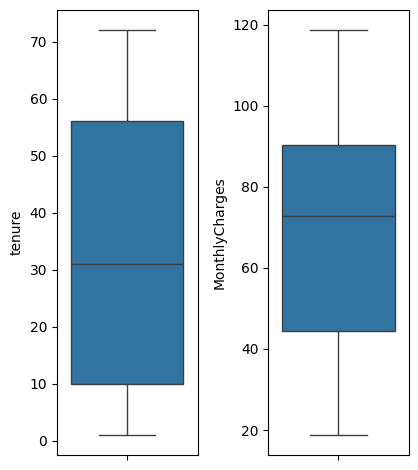

In [13]:
# Check Outlier

for idx, col in enumerate(['tenure', 'MonthlyCharges']):
    sns.boxplot(df[col], ax=plt.subplot(1, 3, idx+1))

plt.tight_layout()
plt.show()

ok sekarang data yang kita miliki sudah bersih, mari sekarang kita lanjut ke tahap Analisa Datanya untuk keperluan masalah kita.

## 4. Exploratory Data Analysis

**4.1 Target Exploration**

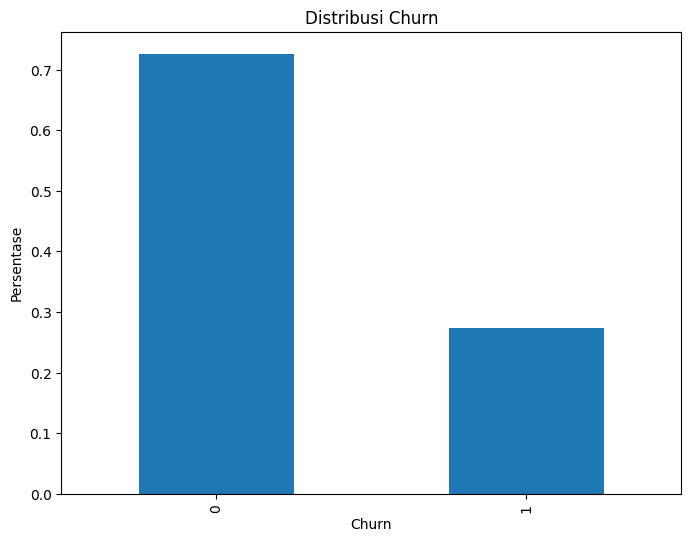

Persentase pelanggan yang melakukan churn: 27.39%
Persentase pelanggan yang tidak melakukan churn: 72.61%


In [14]:
churn_distribution = df['Churn'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
churn_distribution.plot(kind='bar')
plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Persentase')
plt.show()

print(f"Persentase pelanggan yang melakukan churn: {churn_distribution[1]:.2%}")
print(f"Persentase pelanggan yang tidak melakukan churn: {churn_distribution[0]:.2%}")

Insight:

Sekitar seperempat dari total pelanggan memilih untuk melakukan berhenti menggunakan layanan Telco Company (kategori 1 : churn).

**4.2 Analisa Variabel Numerik**

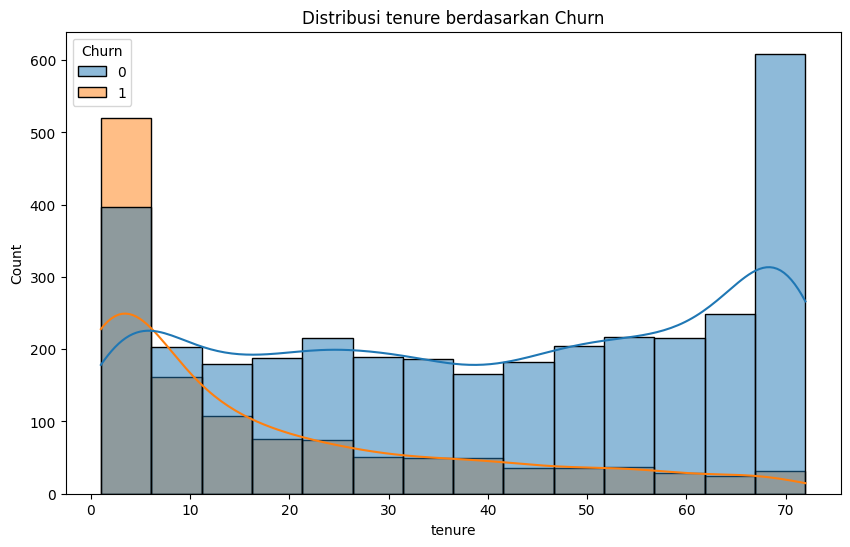


Statistik deskriptif untuk tenure:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      3402.0  39.303057  23.587485  1.0  18.0  41.0  62.0  72.0
1      1283.0  18.083398  19.352468  1.0   2.0  10.0  29.0  72.0


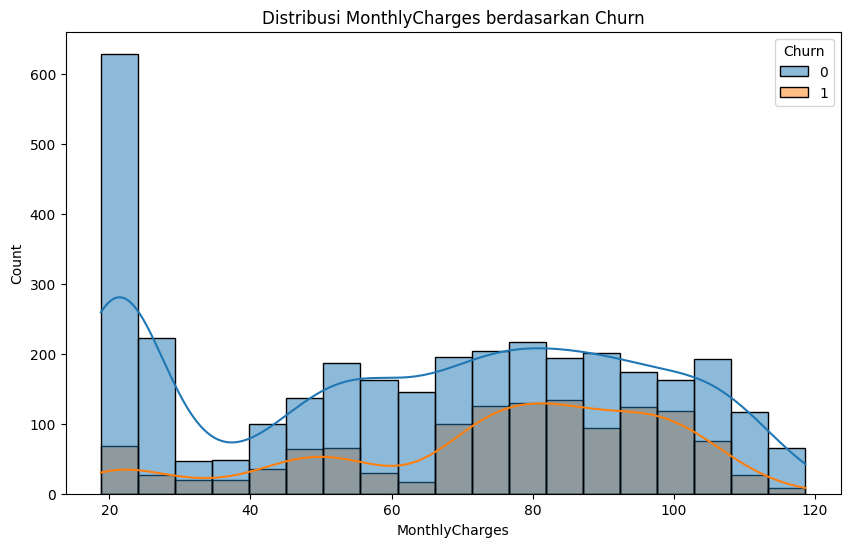


Statistik deskriptif untuk MonthlyCharges:
        count       mean        std    min      25%    50%     75%     max
Churn                                                                     
0      3402.0  63.300852  30.528987  18.80  29.2625  66.85  89.450  118.65
1      1283.0  75.032775  24.147907  18.85  59.6250  80.05  94.275  118.35


In [15]:
numeric_cols = ['tenure', 'MonthlyCharges']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'Distribusi {col} berdasarkan Churn')
    plt.show()
    
    print(f"\nStatistik deskriptif untuk {col}:")
    print(df.groupby('Churn')[col].describe())

Insight
- Tenure : Rata-rata Pelanggan yang melakukan churn bertahan setelah 18 bulan dan mayoritas pelanggan yang melakukan churn berada dalam rentang tenure 0-10 bulan yang menandakan adanya tidak puas terhadap kontrak layanan secara bulanan.
- Monthly Charges : Rata-rata monthly charges pelanggan yang melakukan churn lebih tinggi (75) dibandingkan yang tidak melakukan churn (63).

**4.3 Analisa Variabel Kategorik**

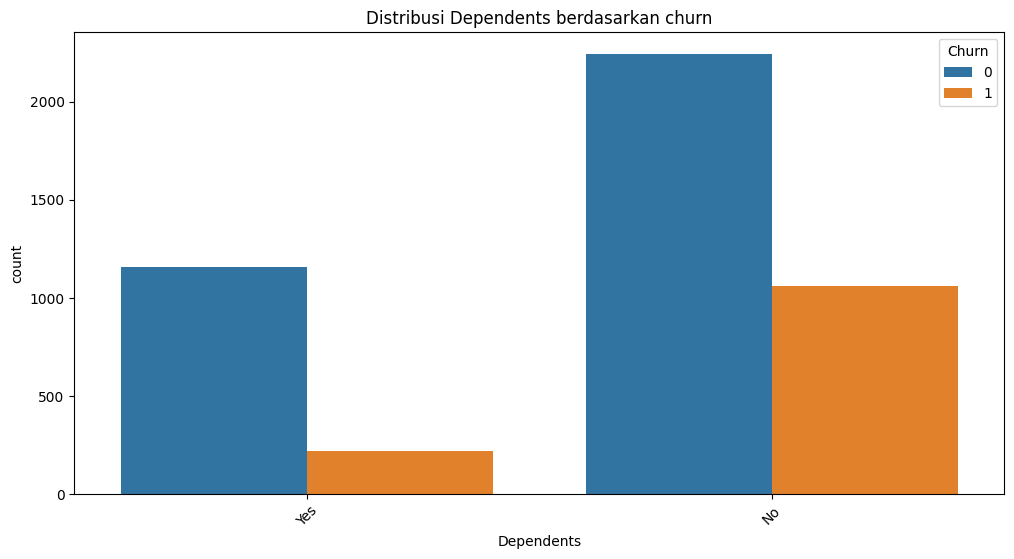


Distribusi Dependents berdasarkan churn:
Dependents    No   Yes
Churn                 
0           2242  1160
1           1062   221

Persentase churn untuk setiap kategori:
Dependents
No     0.321429
Yes    0.160029
Name: 1, dtype: float64


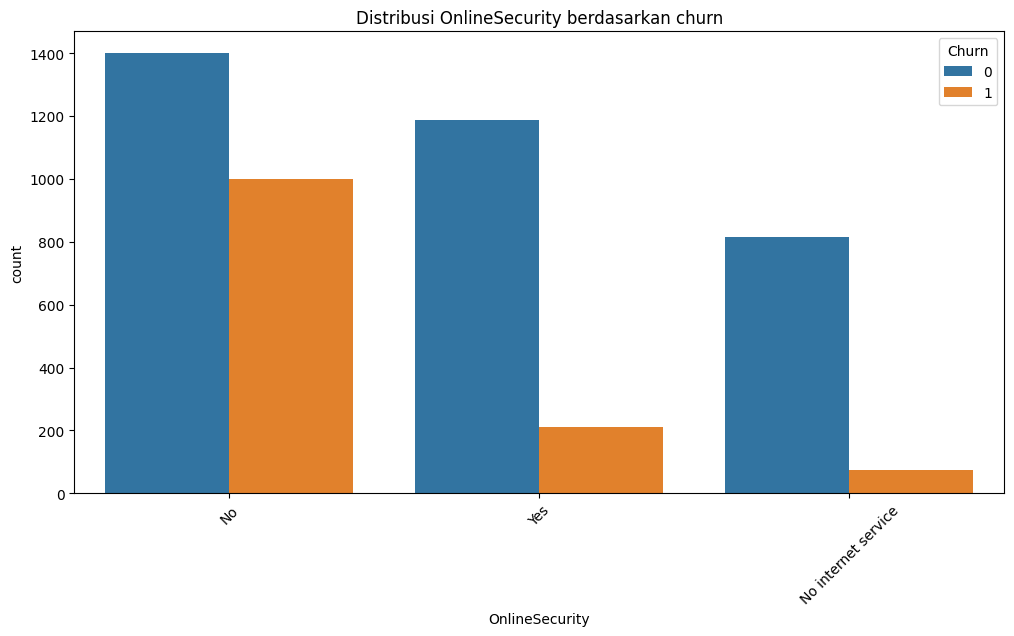


Distribusi OnlineSecurity berdasarkan churn:
OnlineSecurity    No  No internet service   Yes
Churn                                          
0               1399                  815  1188
1                999                   73   211

Persentase churn untuk setiap kategori:
OnlineSecurity
No                     0.416597
Yes                    0.150822
No internet service    0.082207
Name: 1, dtype: float64


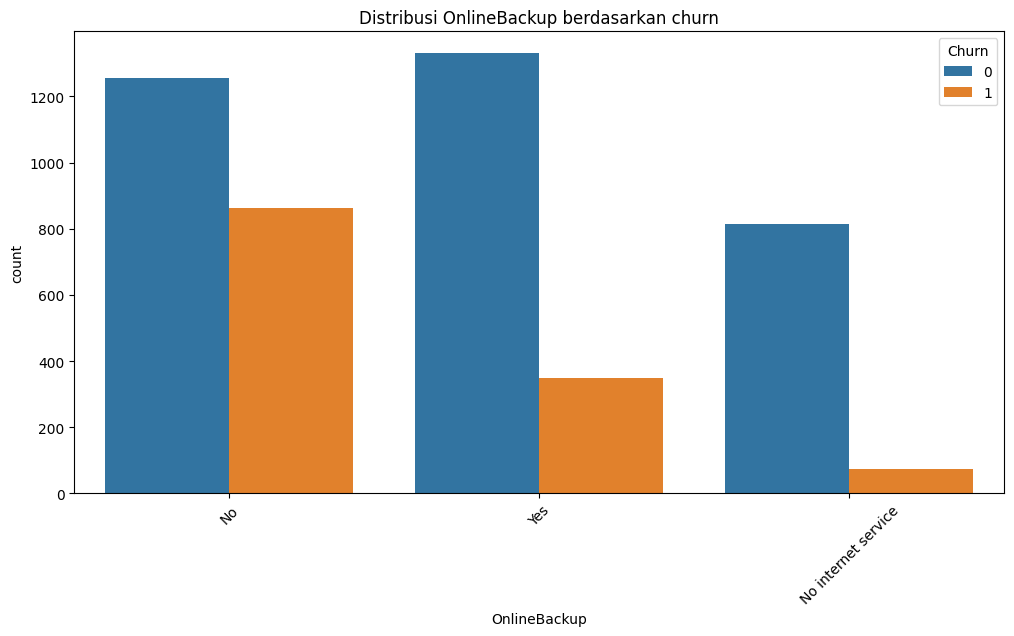


Distribusi OnlineBackup berdasarkan churn:
OnlineBackup    No  No internet service   Yes
Churn                                        
0             1257                  815  1330
1              862                   73   348

Persentase churn untuk setiap kategori:
OnlineBackup
No                     0.406796
Yes                    0.207390
No internet service    0.082207
Name: 1, dtype: float64


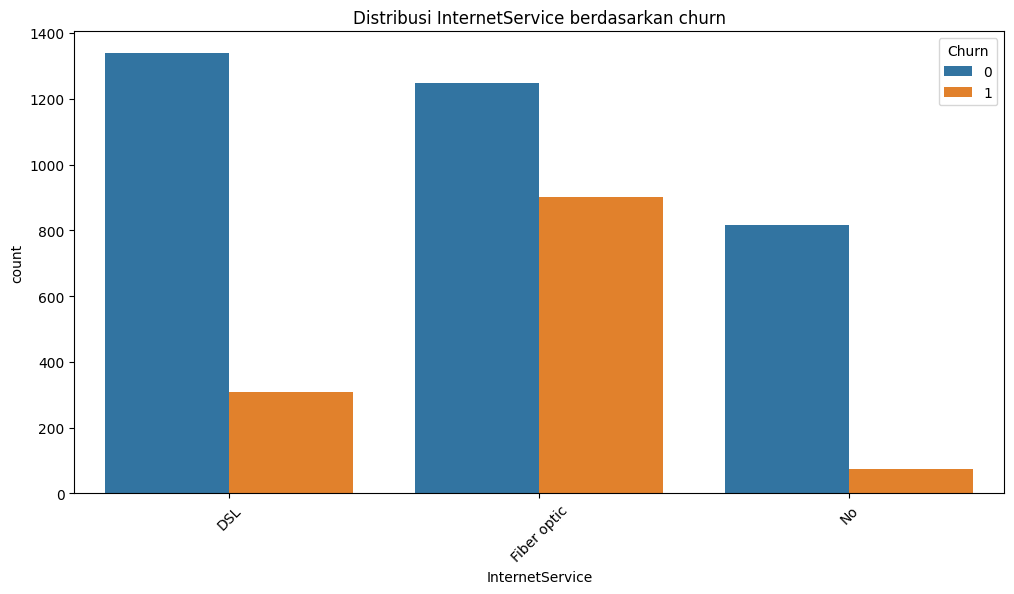


Distribusi InternetService berdasarkan churn:
InternetService   DSL  Fiber optic   No
Churn                                  
0                1338         1249  815
1                 309          901   73

Persentase churn untuk setiap kategori:
InternetService
Fiber optic    0.419070
DSL            0.187614
No             0.082207
Name: 1, dtype: float64


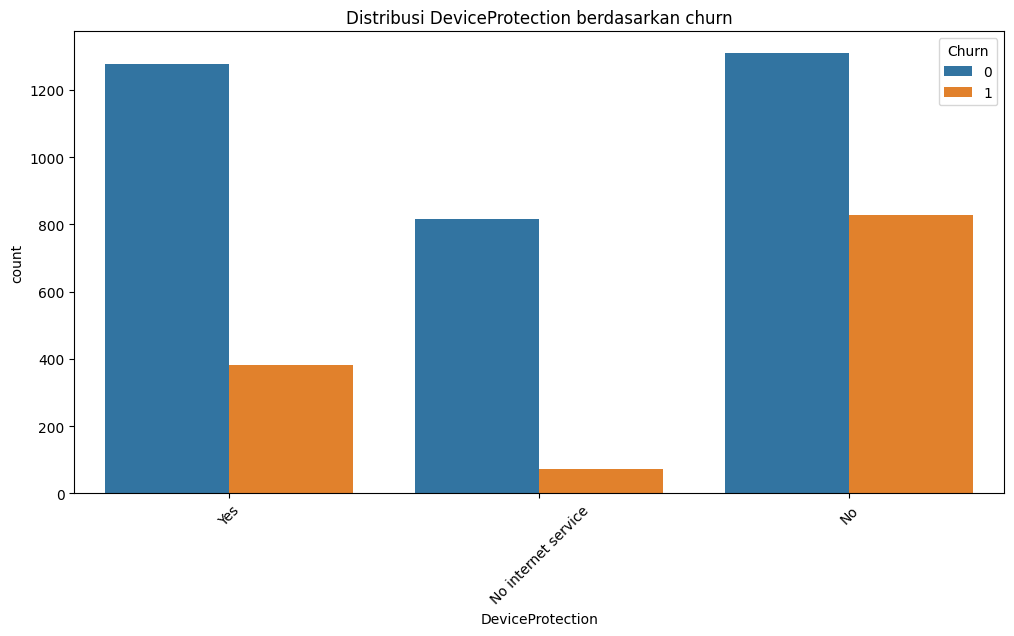


Distribusi DeviceProtection berdasarkan churn:
DeviceProtection    No  No internet service   Yes
Churn                                            
0                 1309                  815  1278
1                  829                   73   381

Persentase churn untuk setiap kategori:
DeviceProtection
No                     0.387746
Yes                    0.229656
No internet service    0.082207
Name: 1, dtype: float64


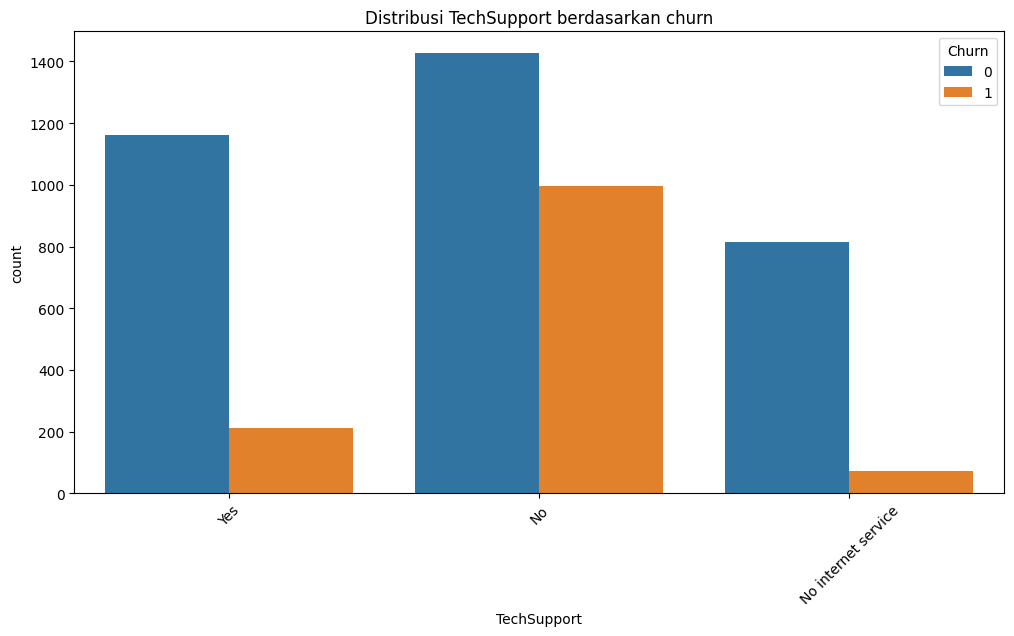


Distribusi TechSupport berdasarkan churn:
TechSupport    No  No internet service   Yes
Churn                                       
0            1426                  815  1161
1             997                   73   213

Persentase churn untuk setiap kategori:
TechSupport
No                     0.411473
Yes                    0.155022
No internet service    0.082207
Name: 1, dtype: float64


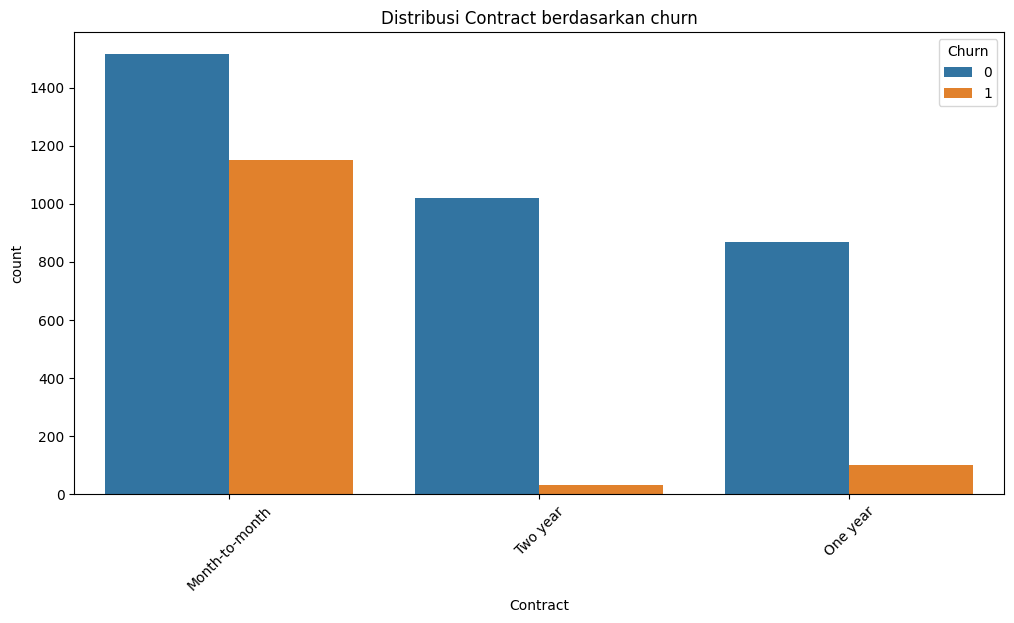


Distribusi Contract berdasarkan churn:
Contract  Month-to-month  One year  Two year
Churn                                       
0                   1515       868      1019
1                   1150       101        32

Persentase churn untuk setiap kategori:
Contract
Month-to-month    0.431520
One year          0.104231
Two year          0.030447
Name: 1, dtype: float64


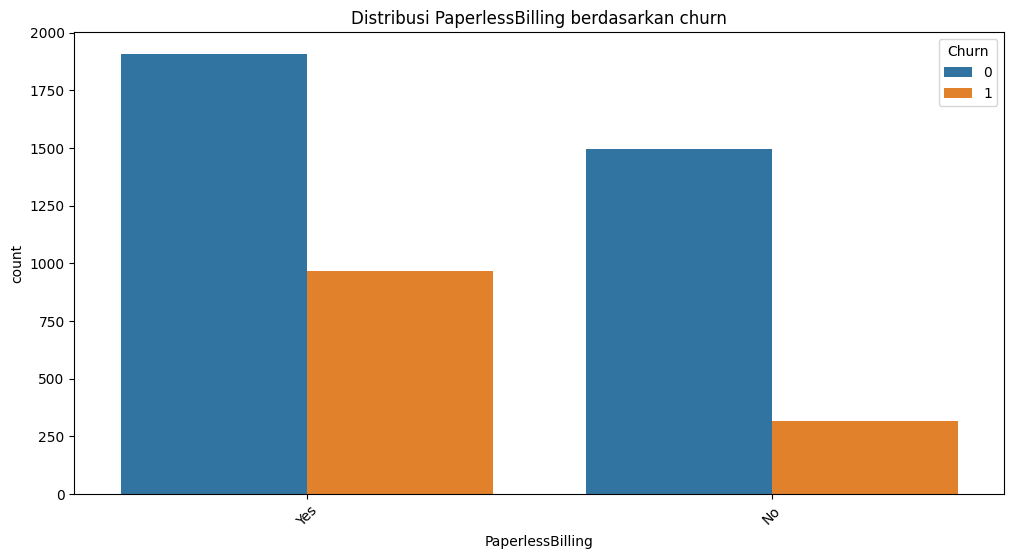


Distribusi PaperlessBilling berdasarkan churn:
PaperlessBilling    No   Yes
Churn                       
0                 1495  1907
1                  316   967

Persentase churn untuk setiap kategori:
PaperlessBilling
Yes    0.336465
No     0.174489
Name: 1, dtype: float64


In [16]:
categorical_cols = ['Dependents','OnlineSecurity','OnlineBackup','InternetService',
                    'DeviceProtection','TechSupport','Contract','PaperlessBilling']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribusi {col} berdasarkan churn')
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"\nDistribusi {col} berdasarkan churn:")
    print(df.groupby(['Churn', col]).size().unstack(fill_value=0))
    print("\nPersentase churn untuk setiap kategori:")
    print(df.groupby(col)['Churn'].value_counts(normalize=True).unstack()[1].sort_values(ascending=False))

Insight :
- Dependents : Mayoritas pelanggan yang melakukan churn merupakan pelanggan yang tidak memiliki tanggungan (32%)

- OnlineSecurity : Mayoritas pelanggan yang melakukan churn merupakan pelanggan yang tidak berlangganan layanan internet/hanya menggunakan layanan lain yang disediakan perusahaan (41.6%)

- OnlineBackup : Mayoritas pelanggan yang melakukan churn merupakan pelanggan yang tidak menggunakan layanan backup online dari Perusahaan (40.6%)

- InternetService : Mayoritas pelanggan yang melakukan churn merupakan pelanggan yang menggunakan fiber optic (41.9%)

- DeviceProtection : Mayoritas pelanggan yang melakukan churn merupakan pelanggan yang tidak menggunakan layanan device protection dari Perusahaan (38.7%)

- Contract : Mayoritas pelanggan yang melakukan churn merupakan pelanggan yang menggunakan layanan dengan kontrak month-to-month (43.1%)

- PaperlessBilling : Mayoritas pelanggan yang melakukan churn merupakan pelanggan yang menggunakan tagihan paperlessbilling dari Perusahaan (33.6%)


## 5. Data Preparation & Feature Engineering

Sekarang mari kita melakukan fitur encoding untuk fitur-fitur yang kita miliki.
Yang akan kita lakukan adalah :
1. Merubah seluruh fitur/kolom non numerik menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah seluruh fitur/kolom numerik menggunakan RobustScaler.


In [17]:
# 1. Define target and feature
target = df['Churn']
feature = df.drop('Churn', axis=1)

In [18]:
# 2. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target, # Menyamakan proporsi kelas untuk setiap subset
                                                    random_state=48)

In [19]:
print(X_train.shape)
print(y_train.shape)

(3748, 10)
(3748,)


In [20]:
feature.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60


In [21]:
# 3. Create object transformation

transformer = ColumnTransformer(transformers=[
    ("Encoding_OHE", OneHotEncoder(drop='first'), ['Dependents','OnlineSecurity','OnlineBackup',
                                                   'InternetService','DeviceProtection','TechSupport',
                                                   'Contract','PaperlessBilling']),
    ("Scaller_Robust", RobustScaler(), ['tenure','MonthlyCharges'])
], remainder='passthrough', verbose_feature_names_out=False)

## 6. Model Development

In [22]:
# Model Initialization
 
# Model Standalone (Non Ensemble)
# Classifier -> Klasifikasi
# Regressor -> Regression

logreg = LogisticRegression(random_state=48)
dt = DecisionTreeClassifier(random_state=48)
knn = KNeighborsClassifier()
svc = SVC(random_state=48)
nn = MLPClassifier(random_state=48)

In [23]:
# Base Pipeline
base_clf = Pipeline(steps=[
    ("FeatureTransformation", transformer),
    ("Classifier", logreg)
])

clf_with_feature_selection = Pipeline(steps=[
    ("FeatureTransformation", transformer),
    ("FeatureSelection", SelectFpr()),
    ("Classifier", logreg)
])

**6.1 Model Benchmarking**

Karena kita sedari awal bertujuan untuk menghindari case False Positive (dimana pelanggan diprediksi tidak churn, namun ternyata churn), maka kita akan berfokus untuk melihat performa model terbaik berdasarkan dari sisi precision.

**6.1.1** Benchmarking with Model Non Ensemble

In [24]:
# List model yang digunakan
models = [logreg, dt, knn, svc, nn]

In [25]:
# Menyimpan score dari tiap model
benchmark_result = {
    "Classifier": [],
    "Avg. Recall": [],
    "Avg. Precision": [],
    "Avg. F2 Score": [],
    "Avg. F2 Score (Train)": [],
    "Std. F2 Score": [],
    "Std. F2 Score (Train)": []
}

In [26]:
# F2 Score
# make_scorer -> Fungsi untuk membuat metrik evaluasi agar dapat dipanggil

f2_score = make_scorer(fbeta_score, beta=2)

In [27]:
models

[LogisticRegression(random_state=48),
 DecisionTreeClassifier(random_state=48),
 KNeighborsClassifier(),
 SVC(random_state=48),
 MLPClassifier(random_state=48)]

In [28]:
for model in models:
    base_clf.set_params(Classifier=model)
    result = cross_validate(base_clf, X_train, y_train, 
                            cv=StratifiedKFold(), # metode validasi silang
                            scoring={'recall':'recall', 'precision':'precision', 'f2_score':f2_score}, # Score yang ingin dilihat
                            return_train_score=True) # Menampilkan score pada data training
    # Model
    benchmark_result['Classifier'].append( model )
    # Scoring
    benchmark_result['Avg. Recall'].append( np.mean(result['test_recall']) )
    benchmark_result['Avg. Precision'].append( np.mean(result['test_precision']) )
    benchmark_result['Avg. F2 Score'].append( np.mean(result['test_f2_score']) )
    benchmark_result['Avg. F2 Score (Train)'].append( np.mean(result['train_f2_score']) )
    benchmark_result['Std. F2 Score'].append(np.std(result['test_f2_score']))
    benchmark_result['Std. F2 Score (Train)'].append( np.std(result['train_f2_score']) )

c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

In [29]:
benchmark_result_base = pd.DataFrame(benchmark_result)

print("Benchmark Base Model (non-ensemble)")
benchmark_result_base

Benchmark Base Model (non-ensemble)


,Classifier,Avg. Recall,Avg. Precision,Avg. F2 Score,Avg. F2 Score (Train),Std. F2 Score,Std. F2 Score (Train)
0,LogisticRegression(random_state=48),0.531158,0.634795,0.548828,0.553596,0.029637,0.005939
1,DecisionTreeClassifier(random_state=48),0.493199,0.486275,0.491591,0.988074,0.017275,0.001296
2,KNeighborsClassifier(),0.494108,0.570859,0.507562,0.636585,0.024302,0.014675
3,SVC(random_state=48),0.468799,0.655422,0.496735,0.510682,0.024261,0.011551
4,MLPClassifier(random_state=48),0.529235,0.650334,0.549388,0.575503,0.033014,0.014498


Terlihat bahwa model SVC adalah yang terbaik untuk dengan avg precision sekitar 0.655422.

**6.1.2** Benchmarking with Model ensemble

In [30]:
stack = StackingClassifier(estimators=[
    ("DecisionTree", dt),
    ("Knn", knn),
    ("NeuralNet", nn)])

rf = RandomForestClassifier(random_state=48)
xgboost = XGBClassifier(random_state=48)
gbs = GradientBoostingClassifier(random_state=48)
lgbm = LGBMClassifier(random_state=48)
adabost = AdaBoostClassifier(random_state=48)

In [31]:
ensemble_models = [stack, rf, xgboost, gbs, lgbm, adabost]

In [32]:
# Menyimpan score dari tiap model
benchmark_result_ensemble = {
    "Classifier": [],
    "Avg. Recall": [],
    "Avg. Precision": [],
    "Avg. F2 Score": [],
    "Avg. F2 Score (Train)": [],
    "Std. F2 Score": [],
    "Std. F2 Score (Train)": []
}

In [33]:
for model in ensemble_models:
    base_clf.set_params(Classifier=model)
    result = cross_validate(base_clf, X_train, y_train, 
                            cv=StratifiedKFold(), # metode validasi silang
                            scoring={'recall':'recall', 'precision':'precision', 'f2_score':f2_score}, # Score yang ingin dilihat
                            return_train_score=True) # Menampilkan score pada data training
    # Model
    benchmark_result_ensemble['Classifier'].append( model )
    # Scoring
    benchmark_result_ensemble['Avg. Recall'].append( np.mean(result['test_recall']) )
    benchmark_result_ensemble['Avg. Precision'].append( np.mean(result['test_precision']) )
    benchmark_result_ensemble['Avg. F2 Score'].append( np.mean(result['test_f2_score']) )
    benchmark_result_ensemble['Avg. F2 Score (Train)'].append( np.mean(result['train_f2_score']) )
    benchmark_result_ensemble['Std. F2 Score'].append(np.std(result['test_f2_score']))
    benchmark_result_ensemble['Std. F2 Score (Train)'].append( np.std(result['train_f2_score']) )

c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

[LightGBM] [Info] Number of positive: 821, number of negative: 2177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 2998, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273849 -> initscore=-0.975180
[LightGBM] [Info] Start training from score -0.975180
[LightGBM] [Info] Number of positive: 821, number of negative: 2177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 2998, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273849 -> initscore=-0.975180
[LightGBM] [

c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R alg

In [34]:
benchmark_result_ensemble = pd.DataFrame(benchmark_result_ensemble)

print("Benchmark Base Model (ensemble)")
benchmark_result_ensemble

Benchmark Base Model (ensemble)


,Classifier,Avg. Recall,Avg. Precision,Avg. F2 Score,Avg. F2 Score (Train),Std. F2 Score,Std. F2 Score (Train)
0,StackingClassifier(estimators=[('DecisionTree'...,0.485371,0.675202,0.514132,0.557530,0.022257,0.003278
1,RandomForestClassifier(random_state=48),0.481482,0.593655,0.500295,0.991712,0.018242,0.000937
2,"XGBClassifier(base_score=None, booster=None, c...",0.511731,0.576926,0.523276,0.862789,0.020021,0.005790
3,GradientBoostingClassifier(random_state=48),0.511679,0.645646,0.533735,0.601386,0.019834,0.007303
4,LGBMClassifier(random_state=48),0.538968,0.611284,0.551832,0.777027,0.018733,0.016079
5,AdaBoostClassifier(random_state=48),0.501913,0.640254,0.524447,0.545699,0.027020,0.011121


Terlihat bahwa model StackingClassifier adalah yang terbaik untuk model ensemble dengan avg precision sekitar 0.675202.

Meskipun model non ensemble juga memiliki avg precision yang tinggi, namun model ensemble yang akan lebih kami pilih untuk digunakan karena yang merupakan model memiliki beberapa model dasar yang beragam dan lebih independen.
Normalnya kita akan memilih model StackingClassifier/GradientBoosting namun perlakuan improvement untuk modelnya cukup kompleks. Telah dilakukan pengujian bahwa skor prediksi yang diperoleh tidak begitu naik secara signifikan sehingga penulis memutuskan untuk memilih pendekatan model lainnya yaitu AdaBoostClassifier, yang dimana menekankan kemampuan untuk mengatasi overfitting dan lebih baik terhadap data imbalance. AdaBoostClassifier juga mampu memberi nilai skor prediksi yang lebih tinggi setelah diimprove.

**6.2 Model Improvement**

Selanjutnya, kita akan melakukan improvement model. Hal pertama yang akan kita coba yaitu dengan melakukan resampling yang dikarenakan proporsi target antara churn dan tidak churn yang kita miliki tidak seimbang. Kita akan melihat apakah avg.precision dari model semakin meningkat atau tidak.

**6.2.1 Experiment 1 : Add Resampling Process**

In [35]:
# Initialization Resample Method

# Over Sampler
ros = RandomOverSampler(random_state=48)
smote = SMOTE(random_state=48)
# Under Sampler
rus = RandomUnderSampler(random_state=48)
nm = NearMiss()
# Combine
smoten = SMOTEENN(random_state=48)

In [36]:
models = [dt, xgboost, gbs]
resample_method = [ros, smote, rus, nm, smoten]

In [37]:
benchmark_result_resample = {
    "Classifier": [],
    "Resample Method": [],
    "Avg. Recall": [],
    "Avg. Precision": [],
    "Avg. F2 Score": [],
    "Avg. F2 Score (Train)": [],
    "Std. F2 Score": [],
    "Std. F2 Score (Train)": []
}

In [38]:
classifier_with_resample = imb_pipeline(steps=[
    ("FeatureTransformation", transformer),
    ("Resample", ros),
    ("Classifier", dt)
])

In [39]:
for model in models:
    classifier_with_resample.set_params(Classifier=model)
    for resample in resample_method:
        classifier_with_resample.set_params(Resample=resample)
        result = cross_validate(classifier_with_resample, X_train, y_train, 
                                cv=StratifiedKFold(), # metode validasi silang
                                scoring={'recall':'recall', 'precision':'precision', 'f2_score':f2_score}, # Score yang ingin dilihat
                                return_train_score=True) # Menampilkan score pada data training
        # Model
        benchmark_result_resample['Classifier'].append( model )
        # Resample
        benchmark_result_resample['Resample Method'].append( resample )
        # Scoring
        benchmark_result_resample['Avg. Recall'].append( np.mean(result['test_recall']) )
        benchmark_result_resample['Avg. Precision'].append( np.mean(result['test_precision']) )
        benchmark_result_resample['Avg. F2 Score'].append( np.mean(result['test_f2_score']) )
        benchmark_result_resample['Avg. F2 Score (Train)'].append( np.mean(result['train_f2_score']) )
        benchmark_result_resample['Std. F2 Score'].append(np.std(result['test_f2_score']))
        benchmark_result_resample['Std. F2 Score (Train)'].append( np.std(result['train_f2_score']) )

In [40]:
benchmark_result_resample = pd.DataFrame(benchmark_result_resample)

print("Benchmark Model using Resample")
benchmark_result_resample.sort_values("Avg. F2 Score", ascending=False)

Benchmark Model using Resample


,Classifier,Resample Method,Avg. Recall,Avg. Precision,Avg. F2 Score,Avg. F2 Score (Train),Std. F2 Score,Std. F2 Score (Train)
12,GradientBoostingClassifier(random_state=48),RandomUnderSampler(random_state=48),0.795292,0.506808,0.713814,0.774214,0.016166,0.005643
14,GradientBoostingClassifier(random_state=48),SMOTEENN(random_state=48),0.776775,0.512115,0.703873,0.744528,0.017658,0.004693
10,GradientBoostingClassifier(random_state=48),RandomOverSampler(random_state=48),0.769946,0.523762,0.703538,0.772569,0.013249,0.003280
7,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=48),0.783623,0.498935,0.703260,0.887050,0.018373,0.001780
9,"XGBClassifier(base_score=None, booster=None, c...",SMOTEENN(random_state=48),0.762141,0.526389,0.699345,0.766485,0.019664,0.008279
11,GradientBoostingClassifier(random_state=48),SMOTE(random_state=48),0.743628,0.541038,0.691427,0.736356,0.013088,0.006051
4,DecisionTreeClassifier(random_state=48),SMOTEENN(random_state=48),0.711471,0.508731,0.658771,0.753114,0.024872,0.009721
6,"XGBClassifier(base_score=None, booster=None, c...",SMOTE(random_state=48),0.663704,0.553562,0.637930,0.886048,0.017911,0.005992
5,"XGBClassifier(base_score=None, booster=None, c...",RandomOverSampler(random_state=48),0.652072,0.535323,0.624642,0.933122,0.023239,0.004591
2,DecisionTreeClassifier(random_state=48),RandomUnderSampler(random_state=48),0.692948,0.446508,0.624014,0.896437,0.022213,0.005321


Terlihat bahwa model yang setelah di oversampling memiliki avg. precision yang justru semakin menurun. Oleh karena itu, kita memutuskan untuk tidak menggunakan metode resampling.

**6.2.2 Experiment 2 : Hyperparameter Tuning**


Sekarang mari kita coba melakukan hyperparameter tuning pada model AdaBoost kita untuk mendapatkan hasil yang lebih baik lagi.

In [41]:
# adaboost
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',adabost)
])


In [42]:
hyperparam_space = [{
    'model__n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'model__learning_rate': [1.0, 0.5, 0.1, 0.05],  # Learning rate for AdaBoost
    # 'model__base_estimator' cannot be directly tuned in the parameter grid'
}]

In [43]:
tuned_classifier = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [44]:
tuned_classifier.fit(X_train,y_train)
print(tuned_classifier.best_score_)
print(tuned_classifier.best_params_)

c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8403289012049342
{'model__learning_rate': 0.1, 'model__n_estimators': 200}


In [45]:
best_model = tuned_classifier.best_estimator_
best_model.fit(X_train, y_train)
estimator.fit(X_train, y_train)

c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding_OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('Scaller_Robust',
                                                  RobustScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])],
                                   verbose_feature_names_out=False)),
                ('model', AdaBoostClassifier(random_state=48))])

In [46]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.839846074616617
ROC AUC Score Tuned LGBM :  0.8411736095216298


In [47]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default AdaBoost : \n', report_default)
print('Classification Report Tuned AdaBoost : \n', report_tuned)

Classification Report Default AdaBoost : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       680
           1       0.69      0.46      0.55       257

    accuracy                           0.80       937
   macro avg       0.76      0.69      0.71       937
weighted avg       0.78      0.80      0.78       937

Classification Report Tuned AdaBoost : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       680
           1       0.69      0.46      0.55       257

    accuracy                           0.79       937
   macro avg       0.75      0.69      0.71       937
weighted avg       0.78      0.79      0.78       937



## 6.3 Model Evaluation

In [48]:
# Evaluation on Testing

# Class Prediction
y_pred_train = tuned_classifier.predict(X_train)
y_pred_test = tuned_classifier.predict(X_test)

# Probability Prediction
y_pred_train_prob = tuned_classifier.predict_proba(X_train)
y_pred_test_prob = tuned_classifier.predict_proba(X_test)

**6.3.1 Confusion Matrix**

Sekarang, kita akan melihat bagaimana perbandingan proporsi confusion matrix untuk tiap kelas-kelas nya.

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

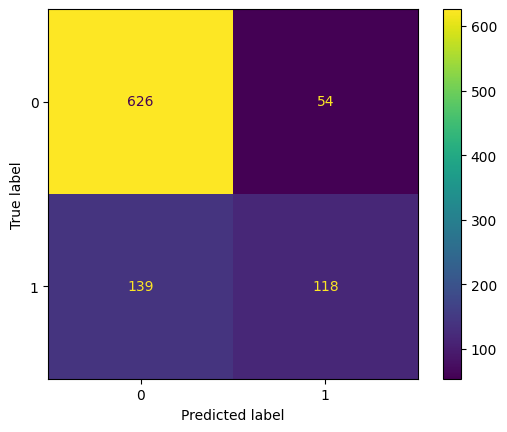

In [50]:
cm = confusion_matrix(y_test, y_pred_test)
cm_plot = ConfusionMatrixDisplay(cm)

cm_plot.plot()
plt.show()

In [51]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       680
           1       0.69      0.46      0.55       257

    accuracy                           0.79       937
   macro avg       0.75      0.69      0.71       937
weighted avg       0.78      0.79      0.78       937



Success Prediction 
- **True Positive (TP)**: Jumlah pelanggan churn yang berhasil diprediksi oleh model<br>
Terdapat 118 dari 357 pelanggan churn yang berhasil diprediksi oleh model.
- **True Negative (TN)**: Jumlah pelanggan yang TIDAK churn yang berhasil diprediksi oleh model<br>
Terdapat 626 dari 680 Pasien yang TIDAK churn berhasil diprediksi oleh model.

Failure Prediction
- **False Positive (FP)**: Jumlah pelanggan TIDAK churn yang gagal diprediksi.<br>
Terdapat 139 pelanggan churn tapi ternyata TIDAK churn.
- **False Negative (FN)**: Jumlah pelanggan churn yang gagal diprediksi. <br>
Terdapat 54 pelanggan yang diprediksi TIDAK churn tetapi ternyata churn.

## 7. Model Interpretation

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model AdaBoost kita

**7.1 Using Feature Importances Method**

In [52]:
best_estimator = tuned_classifier.best_estimator_
best_estimator

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding_OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('Scaller_Robust',
                                                  RobustScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=48))])

In [53]:
adabost_best_model = best_estimator.named_steps['model']

In [54]:
score_imp = adabost_best_model.feature_importances_
score_imp

array([0.045, 0.   , 0.055, 0.005, 0.055, 0.05 , 0.01 , 0.01 , 0.   ,
       0.005, 0.05 , 0.07 , 0.045, 0.045, 0.26 , 0.295])

In [55]:
best_estimator.named_steps['preprocess']

ColumnTransformer(remainder='passthrough',
                  transformers=[('Encoding_OHE', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling']),
                                ('Scaller_Robust', RobustScaler(),
                                 ['tenure', 'MonthlyCharges'])],
                  verbose_feature_names_out=False)

In [56]:
feature_name = best_estimator.named_steps['preprocess'].get_feature_names_out()
feature_name

array(['Dependents_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'tenure', 'MonthlyCharges'], dtype=object)

In [57]:
feature_imp = pd.DataFrame({'Feature': feature_name, 'Score': score_imp}).sort_values('Score', ascending=False)
feature_imp

,Feature,Score
15,MonthlyCharges,0.295
14,tenure,0.260
11,Contract_One year,0.070
2,OnlineSecurity_Yes,0.055
4,OnlineBackup_Yes,0.055
5,InternetService_Fiber optic,0.050
10,TechSupport_Yes,0.050
0,Dependents_Yes,0.045
12,Contract_Two year,0.045
13,PaperlessBilling_Yes,0.045


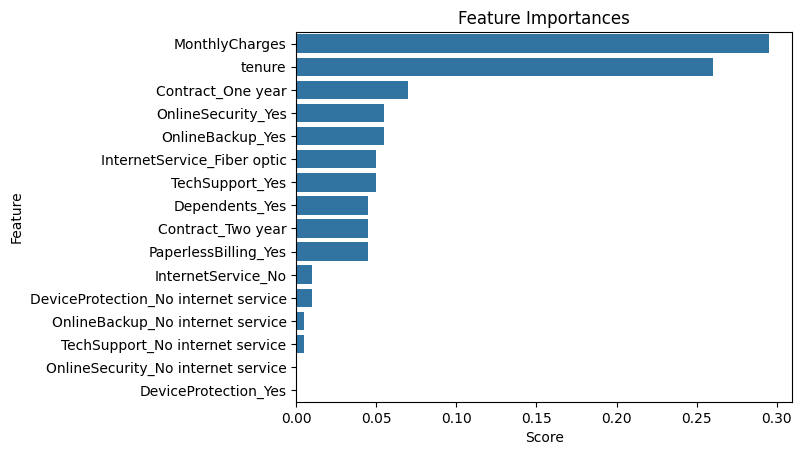

In [58]:
sns.barplot(feature_imp, x='Score', y='Feature')
plt.title("Feature Importances")
plt.show()

**7.2 Using Partial Dependence Method**

In [59]:
from sklearn.inspection import PartialDependenceDisplay

In [60]:
X_test.select_dtypes('object').columns

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')

In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 4785 to 4703
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        937 non-null    object 
 1   tenure            937 non-null    int64  
 2   OnlineSecurity    937 non-null    object 
 3   OnlineBackup      937 non-null    object 
 4   InternetService   937 non-null    object 
 5   DeviceProtection  937 non-null    object 
 6   TechSupport       937 non-null    object 
 7   Contract          937 non-null    object 
 8   PaperlessBilling  937 non-null    object 
 9   MonthlyCharges    937 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 80.5+ KB


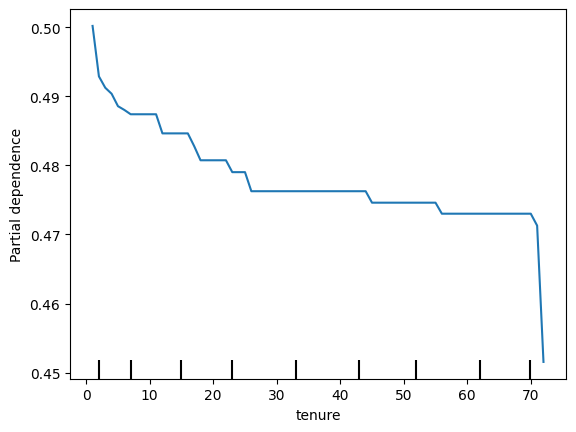

In [62]:
PartialDependenceDisplay.from_estimator(tuned_classifier,X_test,[1], 
                                        categorical_features=X_test.select_dtypes('object').columns)
plt.show()

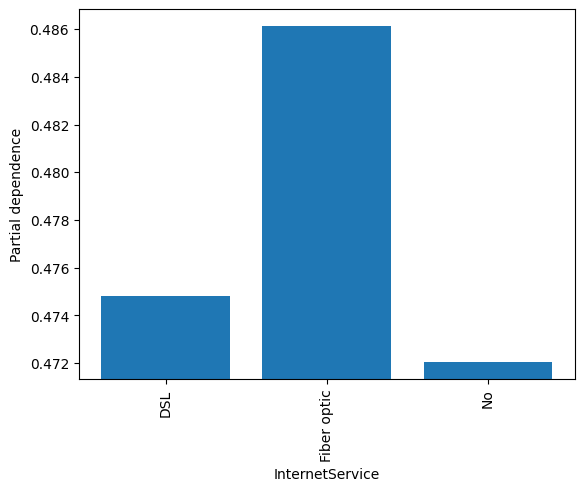

In [63]:
PartialDependenceDisplay.from_estimator(tuned_classifier,X_test,[4], 
                                        categorical_features=X_test.select_dtypes('object').columns)
plt.show()

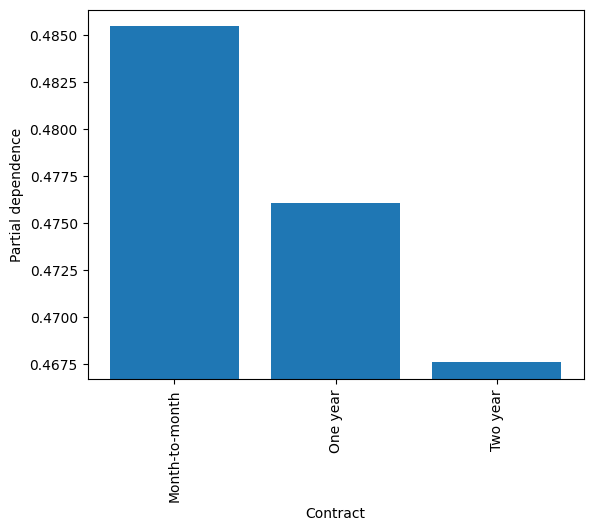

In [64]:
PartialDependenceDisplay.from_estimator(tuned_classifier,X_test,[7], 
                                        categorical_features=X_test.select_dtypes('object').columns)
plt.show()

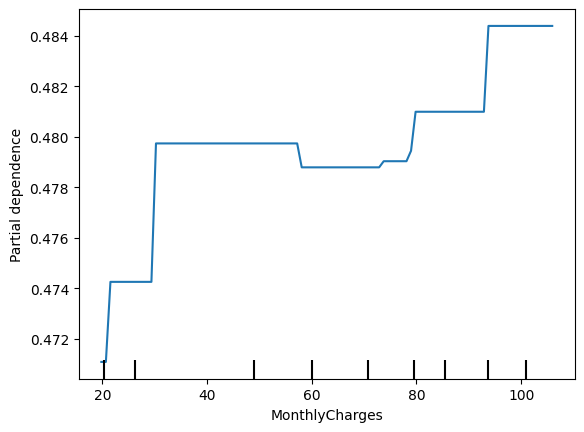

In [65]:
PartialDependenceDisplay.from_estimator(tuned_classifier,X_test,[9], 
                                        categorical_features=X_test.select_dtypes('object').columns)
plt.show()

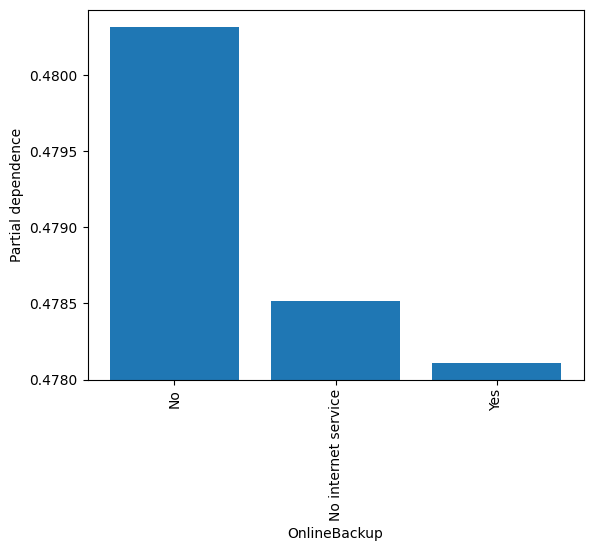

In [66]:
PartialDependenceDisplay.from_estimator(tuned_classifier,X_test,[3], 
                                        categorical_features=X_test.select_dtypes('object').columns)
plt.show()

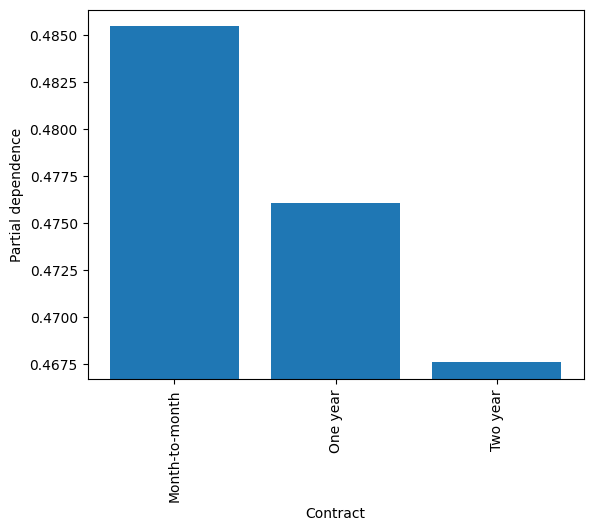

In [67]:
PartialDependenceDisplay.from_estimator(tuned_classifier,X_test,[7], 
                                        categorical_features=X_test.select_dtypes('object').columns)
plt.show()

Terlihat bahwa ternyata untuk model Adaboost kita, fitur/kolom monthly charges adalah yang paling penting, kemudian diikuti dengan tenure, contract, dan selanjutnya.

## 8. Conclusion & Recomendation

In [68]:
print('Classification Report Tuned AdaBoost : \n', report_tuned)

Classification Report Tuned AdaBoost : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       680
           1       0.69      0.46      0.55       257

    accuracy                           0.79       937
   macro avg       0.75      0.69      0.71       937
weighted avg       0.78      0.79      0.78       937



**8.1 Conclusion**

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memprediksi pelanggan yang mana akan churn, maka model kita dapat memprediksi ketepatan sebesar 69% total pelanggan yang akan churn. (Semua ini berdasarkan dari precision karena kita akan menitik beratkan pada ketepatan prediksi true positive untuk pelanggan churn).

Misal dari 100 orang yang diprediksi, kemungkinan churn yang diprediksi akan ada sekitar 69 orang. Normalnya, setelah kita tahu bahwa kita harus melakukan follow up terkait pelanggan yang akan melakukan churn seperti memberi diskon. Kita anggap bahwa diskon yang diberikan adalah 20% dari biaya layanan sebesar 100 USD (melihat dari monthly charges pada dataset). Kita juga anggap hanya 50% yang sudah kita follow up berhasil bertahan. Maka berikut total estimasi biaya yang diperlukan untuk follow up setelah machine learning berhasil memprediksi (anggap kita berhasil mengetahui 1 bulan sebelum pelanggan melakukan churn) :
- Total Biaya => 69 x 20 USD = 1,380 USD
- Total Orang yang tidak jadi churn => 34 orang
- Total Orang yang tetap churn => 35 orang
- Total Biaya yang terbuang => 35 x 20 USD = 700 USD
- Total Biaya yang berhasil => 34 x 20 USD = 680 USD
- Jumlah Omzet yang berhasil dipertahankan => (34 x 100 USD)  = 3,400 USD

Apabila kita tidak menggunakan model, maka dapat dipastikan bahwa perusahaan tidak dapat mempertahankan pelanggan dan akan langsung kehilangan 6,900 USD. Namun dengan penggunaan model, berdasarkan contoh hitungan tersebut, maka perusahaan tersebut akan masih dapat mempertahankan omzet dari 50% pelanggan  yang tidak jadi churn sebesar 3,400 USD dengan biaya melalui pemberian diskon sebesar 1,380 USD.



  

**8.2 Recomendation**

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan dengan ketertarikan pelanggan menggunakan layanan, seperti lokasi kota pelanggan (untuk mengetahui tren kota mana yang lebih sering menggunakan layanan), pekerjaannya sekarang (apakah karyawan, wiraswasta, dan sebagainya), dll.
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, dll. 
- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana (seperti menggunakan model ensemble stacking classifier yang seharusnya memiliki skor paling tinggi sebelum dituning)

## 9. Model Deployment

In [69]:
best_model = tuned_classifier.best_estimator_

In [70]:
best_model.fit(feature,target)

c:\Users\erron.hudyono\AppData\Local\anaconda3\envs\jcds0312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding_OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('Scaller_Robust',
                                                  RobustScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=48))])

In [71]:
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding_OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('Scaller_Robust',
                                                  RobustScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=48))])

In [72]:
import pickle
filename = 'AdaBoost_Model_For_Churn.sav'
pickle.dump(best_model,open(filename,'wb'))